In [430]:
pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [431]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [432]:
hulu_df = pd.read_csv('hulu.csv')
hulu_df.head()

,Title,Type,genres,releaseYear,Imbid,imbdAverageRating,imbdNumVotes,availableCountries
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8752.0,JP
2,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.5,7509.0,JP
3,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315370.0,JP
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516898.0,JP


In [433]:
hulu_df.dtypes


Title                  object
Type                   object
genres                 object
releaseYear           float64
Imbid                  object
imbdAverageRating     float64
imbdNumVotes          float64
availableCountries     object
dtype: object

In [434]:
hulu_df.dtypes

Title                  object
Type                   object
genres                 object
releaseYear           float64
Imbid                  object
imbdAverageRating     float64
imbdNumVotes          float64
availableCountries     object
dtype: object

In [435]:
hulu_df = hulu_df.drop(index=0)


hulu_df = hulu_df.reset_index(drop=True)

# Display the updated DataFrame
hulu_df.head()


,Title,Type,genres,releaseYear,Imbid,imbdAverageRating,imbdNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8752.0,JP
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.5,7509.0,JP
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315370.0,JP
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516898.0,JP
4,My Life Without Me,movie,"Drama, Romance",2003.0,tt0314412,7.4,26029.0,JP


In [436]:
hulu_df.dtypes

Title                  object
Type                   object
genres                 object
releaseYear           float64
Imbid                  object
imbdAverageRating     float64
imbdNumVotes          float64
availableCountries     object
dtype: object

In [437]:

from sklearn.preprocessing import StandardScaler


hulu_df['Title'] = hulu_df['Title'].fillna('Unknown Title')
hulu_df['genres'] = hulu_df['genres'].fillna('Unknown Genre')


hulu_df['releaseYear'] = hulu_df['releaseYear'].fillna(hulu_df['releaseYear'].mean())
hulu_df['imbdAverageRating'] = hulu_df['imbdAverageRating'].fillna(hulu_df['imbdAverageRating'].mean())
hulu_df['imbdNumVotes'] = hulu_df['imbdNumVotes'].fillna(hulu_df['imbdNumVotes'].mean())


hulu_df['genres'] = hulu_df['genres'].astype(str)
hulu_df['availableCountries'] = hulu_df['availableCountries'].astype(str)


hulu_df = pd.get_dummies(hulu_df, columns=['genres', 'availableCountries'], drop_first=False)





scaler = StandardScaler()
hulu_df[['releaseYear', 'imbdAverageRating', 'imbdNumVotes']] = scaler.fit_transform(
    hulu_df[['releaseYear', 'imbdAverageRating', 'imbdNumVotes']]
)



In [438]:
hulu_df.head()

,Title,Type,releaseYear,Imbid,imbdAverageRating,imbdNumVotes,genres_Action,genres_Action & Adventure,"genres_Action & Adventure, Animation","genres_Action & Adventure, Animation, Comedy, Kids",...,"genres_Soap, Action & Adventure",genres_Sport,genres_Talk-Show,genres_Thriller,"genres_Thriller, Horror",genres_Unknown Genre,genres_War,availableCountries_JP,"availableCountries_JP, US",availableCountries_US
0,Ariel,movie,-1.579289,tt0094675,0.779436,-0.219757,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Shadows in Paradise,movie,-1.721478,tt0092149,0.885208,-0.228106,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,Forrest Gump,movie,-1.152721,tt0109830,2.260243,15.274008,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,The Fifth Element,movie,-0.939437,tt0119116,0.990980,3.193507,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,My Life Without Me,movie,-0.512868,tt0314412,0.779436,-0.103705,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [439]:
from sklearn.model_selection import train_test_split

hulu_df = hulu_df.drop(['Title','Imbid','Type'], axis=1)
hulu_df.corr()

,releaseYear,imbdAverageRating,imbdNumVotes,genres_Action,genres_Action & Adventure,"genres_Action & Adventure, Animation","genres_Action & Adventure, Animation, Comedy, Kids","genres_Action & Adventure, Animation, Comedy, Kids, Drama, Sci-Fi & Fantasy","genres_Action & Adventure, Animation, Comedy, Kids, Sci-Fi & Fantasy","genres_Action & Adventure, Animation, Comedy, Kids, Sci-Fi & Fantasy, Drama",...,"genres_Soap, Action & Adventure",genres_Sport,genres_Talk-Show,genres_Thriller,"genres_Thriller, Horror",genres_Unknown Genre,genres_War,availableCountries_JP,"availableCountries_JP, US",availableCountries_US
releaseYear,1.000000,-7.460036e-02,-6.433042e-02,-0.041486,-1.466416e-02,9.947937e-03,2.407236e-03,4.501756e-03,-1.722451e-03,6.057808e-03,...,2.167678e-03,6.057808e-03,0.018242,0.026580,1.072596e-02,0.028879,-3.595559e-02,-0.197020,0.046064,0.186526
imbdAverageRating,-0.074600,1.000000e+00,2.240155e-01,-0.084211,-6.521404e-18,-4.514461e-18,-7.023034e-18,-4.393014e-18,-4.374030e-18,-4.100473e-18,...,-3.577557e-18,-4.399928e-18,0.007199,-0.034835,2.801764e-18,-0.002216,5.263659e-18,-0.114672,0.099448,0.081310
imbdNumVotes,-0.064330,2.240155e-01,1.000000e+00,-0.024181,-1.281190e-18,3.269216e-19,8.395209e-20,-6.147670e-20,-9.944464e-20,-1.540571e-19,...,-1.230805e-18,-9.320714e-20,-0.007512,-0.018282,1.101417e-17,-0.001672,-6.008249e-18,0.003363,0.043274,-0.019715
genres_Action,-0.041486,-8.421142e-02,-2.418080e-02,1.000000,-1.780197e-03,-1.027674e-03,-1.780197e-03,-1.027674e-03,-1.027674e-03,-1.027674e-03,...,-1.027674e-03,-1.027674e-03,-0.002908,-0.006596,-1.027674e-03,-0.013373,-1.027674e-03,0.051465,-0.007575,-0.050397
genres_Action & Adventure,-0.014664,-6.521404e-18,-1.281190e-18,-0.001780,1.000000e+00,-2.074561e-04,-3.593675e-04,-2.074561e-04,-2.074561e-04,-2.074561e-04,...,-2.074561e-04,-2.074561e-04,-0.000587,-0.001332,-2.074561e-04,-0.002700,-2.074561e-04,0.011558,-0.003140,-0.010778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
genres_Unknown Genre,0.028879,-2.215622e-03,-1.672202e-03,-0.013373,-2.699691e-03,-1.558481e-03,-2.699691e-03,-1.558481e-03,-1.558481e-03,-1.558481e-03,...,-1.558481e-03,-1.558481e-03,-0.004410,-0.010003,-1.558481e-03,1.000000,-1.558481e-03,0.011549,-0.007624,-0.009087
genres_War,-0.035956,5.263659e-18,-6.008249e-18,-0.001028,-2.074561e-04,-1.197605e-04,-2.074561e-04,-1.197605e-04,-1.197605e-04,-1.197605e-04,...,-1.197605e-04,-1.197605e-04,-0.000339,-0.000769,-1.197605e-04,-0.001558,1.000000e+00,0.006672,-0.001813,-0.006222
availableCountries_JP,-0.197020,-1.146723e-01,3.362607e-03,0.051465,1.155778e-02,6.672087e-03,1.155778e-02,6.672087e-03,6.672087e-03,6.672087e-03,...,-1.794948e-02,6.672087e-03,-0.050790,0.019698,6.672087e-03,0.011549,6.672087e-03,1.000000,-0.271679,-0.932526
"availableCountries_JP, US",0.046064,9.944825e-02,4.327372e-02,-0.007575,-3.140002e-03,-1.812664e-03,-3.140002e-03,-1.812664e-03,-1.812664e-03,-1.812664e-03,...,-1.812664e-03,-1.812664e-03,-0.005129,-0.001008,-1.812664e-03,-0.007624,-1.812664e-03,-0.271679,1.000000,-0.094173


In [440]:
hulu_df.dtypes

releaseYear                  float64
imbdAverageRating            float64
imbdNumVotes                 float64
genres_Action                   bool
genres_Action & Adventure       bool
                              ...   
genres_Unknown Genre            bool
genres_War                      bool
availableCountries_JP           bool
availableCountries_JP, US       bool
availableCountries_US           bool
Length: 607, dtype: object

In [441]:
y = hulu_df['imbdAverageRating']
x = hulu_df[['releaseYear','genres_Action & Adventure','genres_War','genres_Comedy','genres_Sci-Fi','genres_Fantasy','genres_Drama','genres_Sport','genres_Soap','genres_Horror','genres_Thriller','availableCountries_JP','availableCountries_US','availableCountries_JP, US']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [442]:
from sklearn.linear_model import LinearRegression


regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [443]:
y_pred = regression.predict(X_test) 
y_pred

array([ 0.04931641, -0.02197266,  0.14257812, ...,  0.21337891,
       -0.11279297,  0.31738281])

In [444]:
accuracy_score = regression.score(x_test, y_test)
accuracy_score

-58940699737062.3

In [445]:
print(X.shape)

(8351, 14)


In [446]:
print(y.shape)

(8351,)


In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f'R-squared: {model.score(x_test, y_test)}')


R-squared: -2342379345798876.5


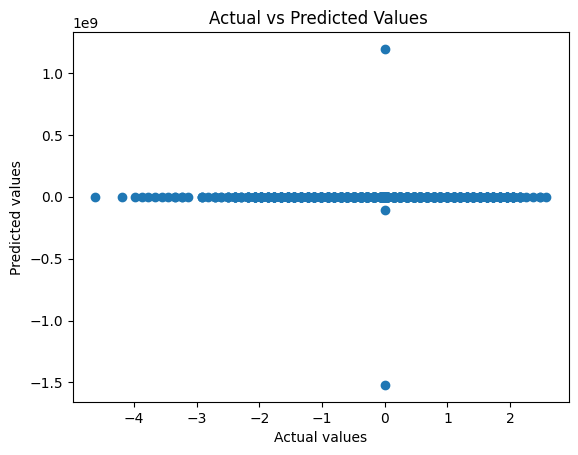

In [448]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values ')
plt.show()



In [449]:
# Random forest Regressor 

In [450]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf= RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




print(f'Mean Squared Error : {mse:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error : 0.9441
R² Score: 0.0140


Mean Squared Error: 0.9440861449606409


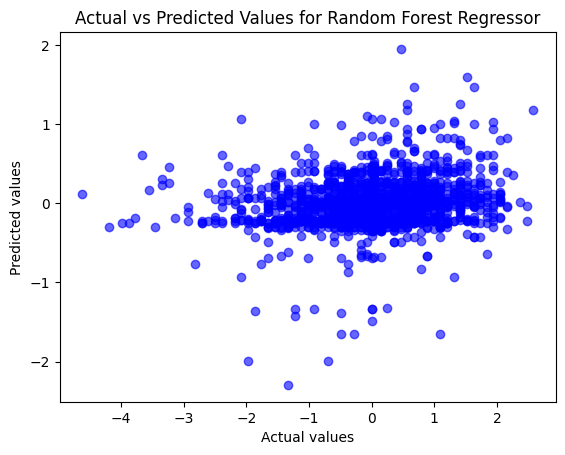

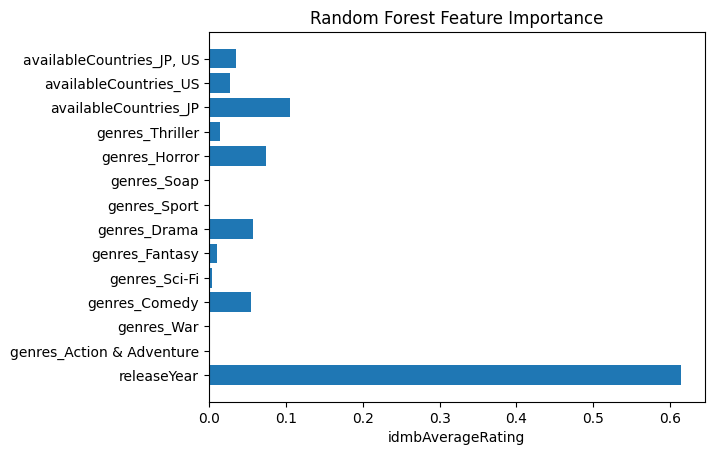

In [451]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.show()


importances = rf_model.feature_importances_


plt.barh(np.arange(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), X.columns)  # X.columns for feature names
plt.xlabel('idmbAverageRating')
plt.title('Random Forest Feature Importance')
plt.show()
